<style>
    div#header-container {
        display: none;
    }
</style>


# Importando bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados


In [2]:
# Carregando dados
data = pd.read_csv ('Financials.csv',sep =",")
data.shape

(700, 16)

 Analise: O dataframe possui 700 linhas e 16 colunas

# Visualizando os dados



In [3]:
# Visualizando as primeiras linhas
data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


Análise: aqui percebemos que os dados precisam ser tratados, possuem caracteres que podem dificultar na análise.


In [4]:
# Verificando a quantidade de linhas não-nulas e os tipos das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

Análise: Algumas colunas que contém valores numéricos estão sendo tratadas como objetos.

In [5]:
# Verificando valores NAs em todas as colunas
data.isna().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

Análise: Existem valores Nas nas colunas Dicount e Profit.


In [6]:
# verificando o nome das colunas
data.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

Análise: O dicionário das colunas encontra-se no Readme do projeto.

# Tratamento dos dados

Aqui inicia-se o tratamento dos dados, onde removi caracteres desnecessários, espaços extras nas colunas, convertendo variaveis para tipo inteiros.   
Nas colunas Discount e Profit foram encontrados valores NAs, optei por substituir por zero, pois acredito que são produtos que não tiveram descontos e nem lucros.

In [7]:
# Removendo espaços em branco extras nos nomes das colunas
data.columns = [col.strip() for col in data.columns]

In [8]:
# Removendo o caracter , das colunas
data = data.replace({'\,':'','\$':'','\-':'','\.':''}, regex=True)

In [9]:
# Verificando o que foi tratado 
data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,161850,300,2000,3237000,,3237000,1618500,1618500,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,132100,300,2000,2642000,,2642000,1321000,1321000,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,217800,300,1500,3267000,,3267000,2178000,1089000,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,88800,300,1500,1332000,,1332000,888000,444000,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,247000,300,1500,3705000,,3705000,2470000,1235000,01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,151300,300,35000,52955000,,52955000,39338000,13617000,01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,92100,500,1500,1381500,,1381500,921000,460500,01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,251800,500,1200,3021600,,3021600,755400,2266200,01/06/2014,6,June,2014
8,Government,France,Montana,None,189900,500,2000,3798000,,3798000,1899000,1899000,01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,154500,500,1200,1854000,,1854000,463500,1390500,01/06/2014,6,June,2014


In [10]:
# Definindo colunas numericas
monetary_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


In [11]:
# Substituindo espaços por zeros e convertendo para tipo int
for col in monetary_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')

In [16]:
# Verificando coversão dos tipos dos dados
data.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold              Int64
Manufacturing Price     Int64
Sale Price              Int64
Gross Sales             Int64
Discounts               Int64
Sales                   Int64
COGS                    Int64
Profit                  Int64
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

In [12]:
#Dividir as colunas numericas por 100
data[monetary_columns]=data[monetary_columns]/100

In [13]:
data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,<NA>,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,<NA>,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,<NA>,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,<NA>,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,<NA>,37050.0,24700.0,12350.0,01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3.0,350.0,529550.0,<NA>,529550.0,393380.0,136170.0,01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5.0,15.0,13815.0,<NA>,13815.0,9210.0,4605.0,01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5.0,12.0,30216.0,<NA>,30216.0,7554.0,22662.0,01/06/2014,6,June,2014
8,Government,France,Montana,None,1899.0,5.0,20.0,37980.0,<NA>,37980.0,18990.0,18990.0,01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,18540.0,<NA>,18540.0,4635.0,13905.0,01/06/2014,6,June,2014


In [14]:
# Modificando o formato das datas e verificando
date_column = 'Date'
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
first_date = data[date_column].iloc[0]
print('Formato da coluna "Date":', first_date.strftime('%d-%m-%Y'))

Formato da coluna "Date": 01-01-2014


# Análise dos Dados



In [15]:
# Análise estatística da coluna Units Sold
data['Units Sold'].describe()

count          700.0
mean     1608.294286
std       867.427859
min            200.0
25%            905.0
50%           1542.5
75%         2229.125
max           4492.5
Name: Units Sold, dtype: Float64

Análise da coluna Units Sold(Unidades Vendidas).  
A média de unidades vendidas é de aproximadamente 1608;  
O valor mínimo de unidades vendidas é 200;  
O valor máximo de unidades vendidas é de 4492.


In [16]:
# Análise estatística da coluna Sales
data.Sales.describe()

count            700.0
mean     169609.071843
std      236726.346899
min            1655.08
25%            15928.0
50%            35540.2
75%           261077.5
max          1159200.0
Name: Sales, dtype: Float64

Análise da coluna Sales(Vendas) dada em dolares.  
A média de vendas é de aproximadamente 169,609.07;  
O valor mínimo de vendas é de aproximadamente 1.655,08;  
O valor máximo de vendas é de aproximadamente 1,159,200.00.


In [17]:
# Análise estatística da coluna Profit
data.Profit.describe()

count           637.0
mean     27741.010267
std      43059.332905
min             285.6
25%           3875.85
50%           11106.1
75%           25162.0
max          262200.0
Name: Profit, dtype: Float64

Análise da coluna Profit(Lucro).  
A média de lucro é de aproximadamente 27,741.01;  
O valor mínimo de lucro é 285.60;   
O valor máximo de lucro é de aproximadamente 262,200.00.

In [18]:
# Agrupamento pelo ano (Year) e número do mês (Month number) e 
#calculo da soma das vendas (Sales) e lucro (Profit) para cada grupo
grupo_por_mes_ano = data.groupby(['Year', 'Month Number']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

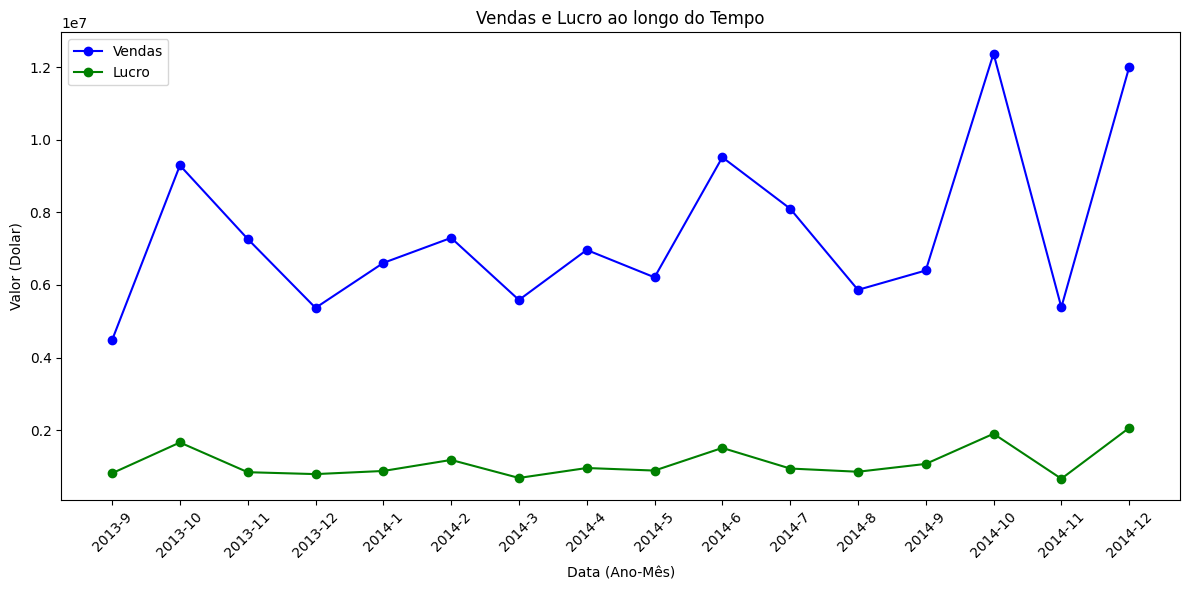

In [19]:
# Gráfico de linhas com as colunas 'Year' e 'Month number' no eixo x, 'Sales' e 'Profit' no eixo y
plt.figure(figsize=(12, 6))
plt.plot(grupo_por_mes_ano['Year'].astype(str) + '-' + grupo_por_mes_ano['Month Number'].astype(str), grupo_por_mes_ano['Sales'], label='Vendas', marker='o', linestyle='-', color='b')
plt.plot(grupo_por_mes_ano['Year'].astype(str) + '-' + grupo_por_mes_ano['Month Number'].astype(str), grupo_por_mes_ano['Profit'], label='Lucro', marker='o', linestyle='-', color='g')

# Definir rótulos e título do gráfico
plt.xlabel('Data (Ano-Mês)')
plt.ylabel('Valor (Dolar)')
plt.title('Vendas e Lucro ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


Análise do gráfico de vendas e lucro em relação ao tempo:

A análise mostra os valores de vendas e lucro para cada mês dos anos de 2013 e 2014. É evidente que tanto as vendas quanto o lucro aumentaram significativamente ao longo desses anos. Isso pode indicar um crescimento nos negócios.

As vendas e o lucro parecem aumentar consideravelmente nos meses de outubro e dezembro, o que pode estar relacionado a períodos de festas e promoções.

Alguns meses, como agosto de 2014, mostram uma queda acentuada nas vendas e no lucro em comparação aos outros meses. Esses picos e quedas podem ser explorados para entender as causas.

Comparando os anos de 2013 e 2014, é notável que as vendas e o lucro em 2014 são consideravelmente maiores. Isso pode ser um sinal de um ano financeiramente bem-sucedido ou de uma expansão bem-sucedida do negócio.

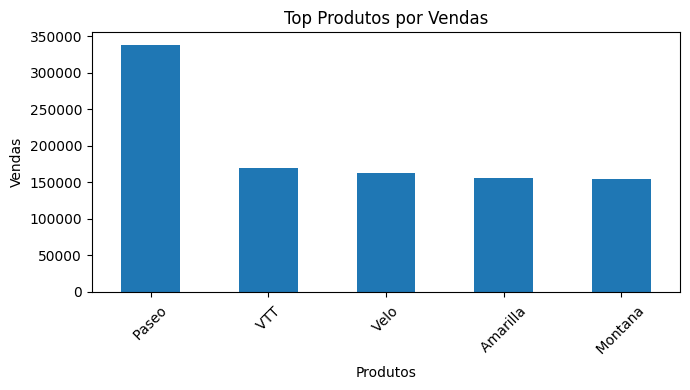

In [20]:
# Gráfico de produtos mais vendidos

# Agrupar por produto e somar as quantidades vendidas
product_sales = data.groupby('Product')['Units Sold'].sum()

# Classificar os produtos pelas vendas em ordem decrescente
sorted_products = product_sales.sort_values(ascending=False)

# Obter os produtos com as maiores vendas
top_products = sorted_products.head() 

# Criar o gráfico           
plt.figure(figsize=(7, 4))  
top_products.plot(kind='bar')
plt.title('Top Produtos por Vendas')  
plt.xlabel('Produtos')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  

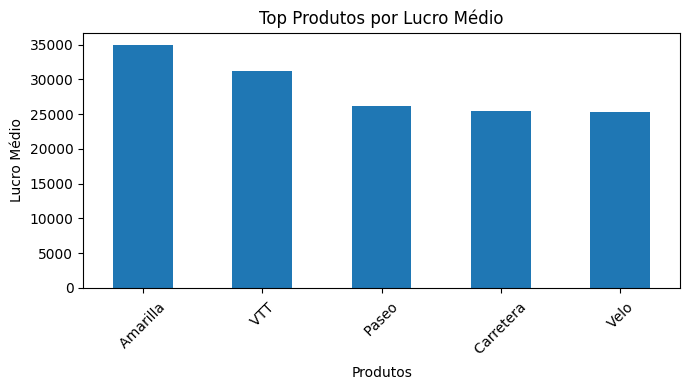

In [21]:
#Gráfico de lucro médio dos produtos

# Agrupar por produto e calcular a média dos lucros
product_profit = data.groupby('Product')['Profit'].mean()

# Classificar os produtos pelos lucros em ordem decrescente
sorted_products = product_profit.sort_values(ascending=False)

# Obter os produtos com os maiores lucros médios
top_products = sorted_products.head()  # Altere o número para a quantidade desejada

# Definir um tamanho adequado para a figura do gráfico
plt.figure(figsize=(7,4))

# Criar o gráfico de barras
top_products.plot(kind='bar')
plt.title('Top Produtos por Lucro Médio') 
plt.xlabel('Produtos')  
plt.ylabel('Lucro Médio') 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  


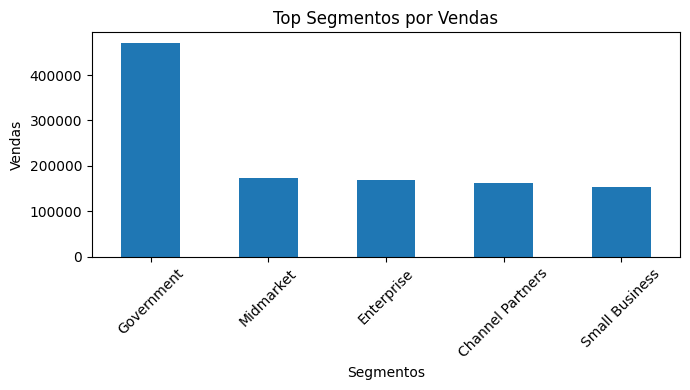

In [22]:
# Gráfico de vendas por Segmento

# Agrupar por segmento e somar as quantidades vendidas
segment_sales = data.groupby('Segment')['Units Sold'].sum()

# Classificar os segmentos pelas vendas em ordem decrescente
sorted_segments = segment_sales.sort_values(ascending=False)

# Obter os segmentos com as maiores vendas
top_segments = sorted_segments.head() 

# Criar o gráfico de barras
plt.figure(figsize=(7, 4))  
top_segments.plot(kind='bar')
plt.title('Top Segmentos por Vendas') 
plt.xlabel('Segmentos')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()  


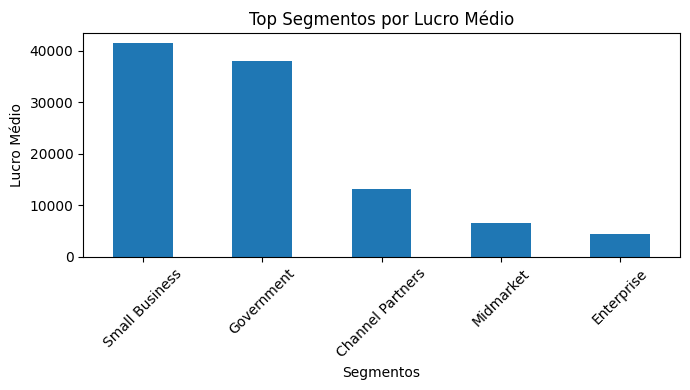

In [23]:
# Gráfico de lucro médio por segmento

# Agrupar por segmento e calcular a média dos lucros
segment_profit = data.groupby('Segment')['Profit'].mean()

# Classificar os segmentos pelos lucros em ordem decrescente
sorted_segments = segment_profit.sort_values(ascending=False)

# Obter os segmentos com os maiores lucros
top_segments = sorted_segments.head()  

# Criar o gráfico de barras
plt.figure(figsize=(7, 4))  
top_segments.plot(kind='bar')
plt.title('Top Segmentos por Lucro Médio')  
plt.xlabel('Segmentos')  
plt.ylabel('Lucro Médio')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  


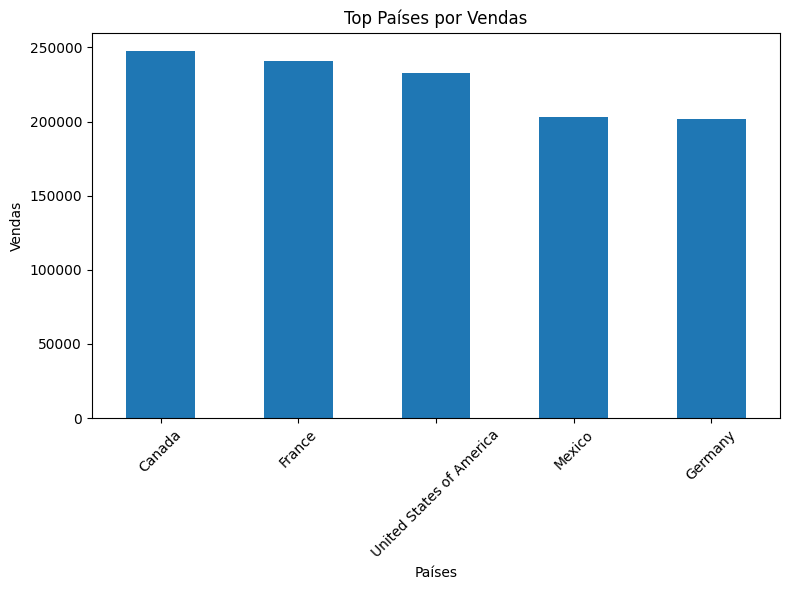

In [24]:
#Gráfico de vendas por países

# Agrupar por país e somar as quantidades vendidas
country_sales = data.groupby('Country')['Units Sold'].sum()

# Classificar os países pelas vendas em ordem decrescente
sorted_countries = country_sales.sort_values(ascending=False)

# Obter os países com as maiores vendas
top_countries = sorted_countries.head()  

# Criar o gráfico de barras
plt.figure(figsize=(8,6))  
top_countries.plot(kind='bar')
plt.title('Top Países por Vendas')  
plt.xlabel('Países')  
plt.ylabel('Vendas')  
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()  

<Figure size 1200x800 with 0 Axes>

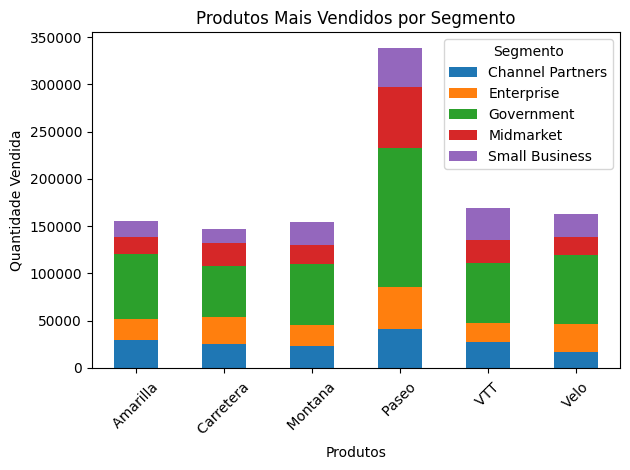

In [25]:
# Gráfico de barra empilhada com produtos mais vendidos em cada segmento

# Criar uma tabela pivô para calcular as vendas de cada produto em cada segmento
pivot_table = data.pivot_table(index='Product', columns='Segment', values='Units Sold', aggfunc='sum')


plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Produtos Mais Vendidos por Segmento') 
plt.xlabel('Produtos') 
plt.ylabel('Quantidade Vendida')  
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.legend(title='Segmento') 
plt.show()  

Analise dos gráficos:
O produto mais vendido foi Paseo, porem o que obteve maior lucro médio são os Amarilla e VTT.    
O segmento com maior venda foi o Government, mas o que obteve maior lucro foi o Small Business, mas com uma venda baixa, acredito por ser um segmento de uma categoria que geralmente se refere a empresas de pequeno porte em termos de receita, número de funcionários e escala de operações.  
As vendas foram praticamente as mesmas nos países analisados.  
Podem tomar medidas como marketing nos produtos com maiior lucro médio, para que assim as vendas aumentem e consequentemente o lucro.  

